In [78]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [79]:
df=pd.read_csv('adult.data')
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [80]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
df.columns = col_labels

In [81]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [82]:
df.dropna(inplace=True)

In [83]:
df["wage_class"]=df.wage_class.map({' <=50K':0, ' >50K':1})

In [84]:
df["wage_class"]

0        0
1        0
2        0
3        0
4        0
5        0
6        1
7        1
8        1
9        1
10       1
11       0
12       0
13       1
14       0
15       0
16       0
17       0
18       1
19       1
20       0
21       0
22       0
23       0
24       1
25       0
26       1
27       0
28       0
29       0
        ..
32530    0
32531    1
32532    1
32533    0
32534    0
32535    1
32536    0
32537    1
32538    1
32539    0
32540    0
32541    0
32542    0
32543    0
32544    1
32545    0
32546    0
32547    0
32548    0
32549    0
32550    0
32551    0
32552    0
32553    1
32554    0
32555    0
32556    1
32557    0
32558    0
32559    1
Name: wage_class, Length: 32560, dtype: int64

In [85]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
wage_class         int64
dtype: object

In [86]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [87]:
df['workclass']=le.fit_transform(df.workclass.values)
df['education']=le.fit_transform(df.education.values)
df['marital_status']=le.fit_transform(df.marital_status.values)
df['occupation']=le.fit_transform(df.occupation.values)
df['relationship']=le.fit_transform(df.relationship.values)
df['race']=le.fit_transform(df.race.values)
df['sex']=le.fit_transform(df.sex.values)
df['native_country']=le.fit_transform(df.native_country.values)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000E00CBCACF8>,
      dtype=object)

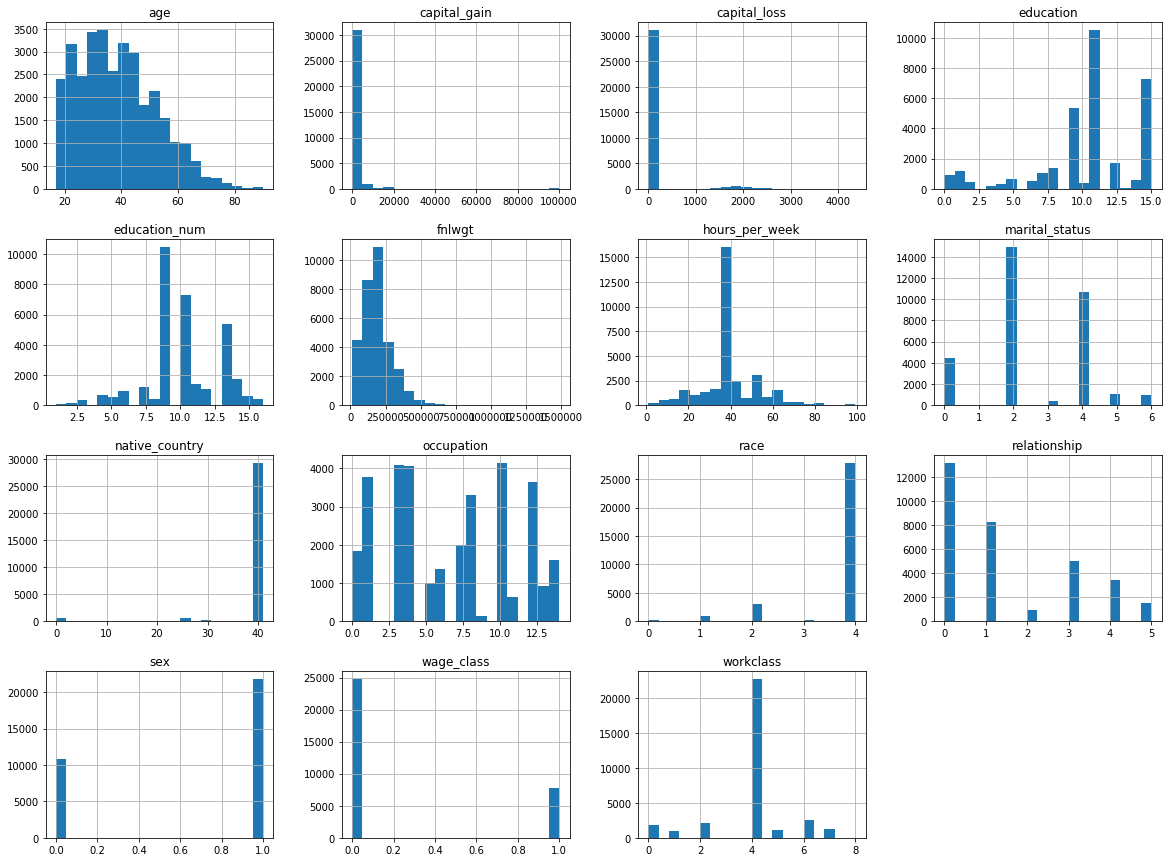

In [88]:
df.hist(bins=20,figsize=(20,15))

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

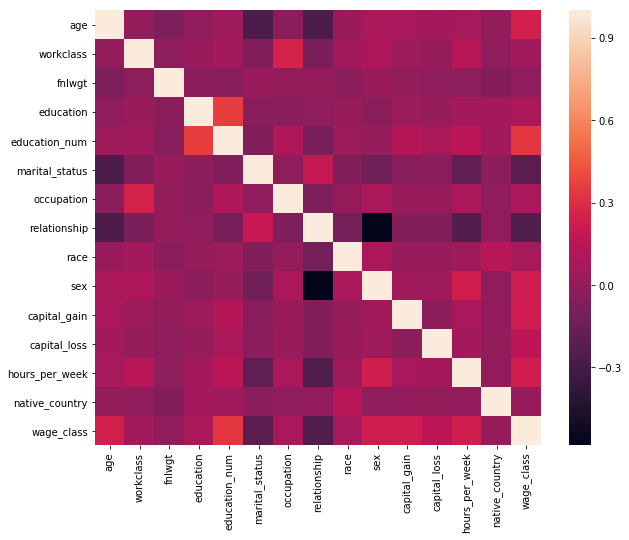

In [90]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
plt.show()

In [91]:
x=df.drop(["wage_class"],axis=1)
y=df.wage_class

In [92]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=10)
from sklearn.preprocessing import StandardScaler

In [93]:
sc_X = StandardScaler()
X_train_trans = sc_X.fit_transform(X_train)
X_test_trans = sc_X.fit_transform(X_test)

y_train_new = np.log(y_train)
y_test_new = np.log(y_test)

C:\Users\viresh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\viresh\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\viresh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\viresh\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\viresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
#Random Forest Regression and Fit the train data
randomForest = RandomForestRegressor(n_estimators=500, oob_score=True, n_jobs=-1,random_state=10)
randomForest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=True, random_state=10, verbose=0, warm_start=False)

In [52]:
predictions = randomForest.predict(X_test)
r_sq_score = r2_score(y_test, predictions)
r_sq_score
# The accuracy is 43%

0.431938185834158

In [98]:
predictions = np.exp(predictions)
y_test = np.exp(y_test)

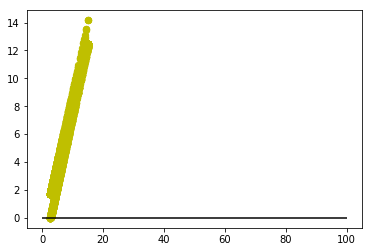

In [100]:
plt.scatter(predictions,(predictions-y_test),c='y',s=40)
plt.hlines(y=0,xmin=0,xmax=100)

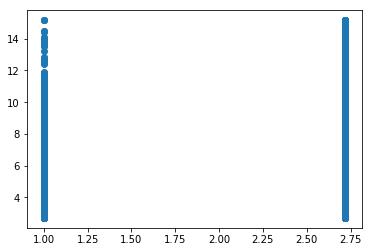

In [101]:
plt.scatter(y_test,predictions)